# Energy of photons after undergoing Compton Scattering

Below is a Python code which caclulates the energy of scattered electrons and photons at all angles after undergoing Compton Scattering. The equations have been taken from Khan's Physics of Radiation Therapy, pg. 65. The equation for scattered electron energy, scattered photonon energy and scattered electron direction are given below:

$$
E = hv_0 \frac{\alpha(1-cos\phi)}{1+\alpha(1-cos\phi)}
$$

$$
hv' = hv_0 = \frac{1}{1+\alpha(1-cos\phi)}
$$

$$
cot\theta = (1+\alpha)tan(\frac{\phi}{2})
$$

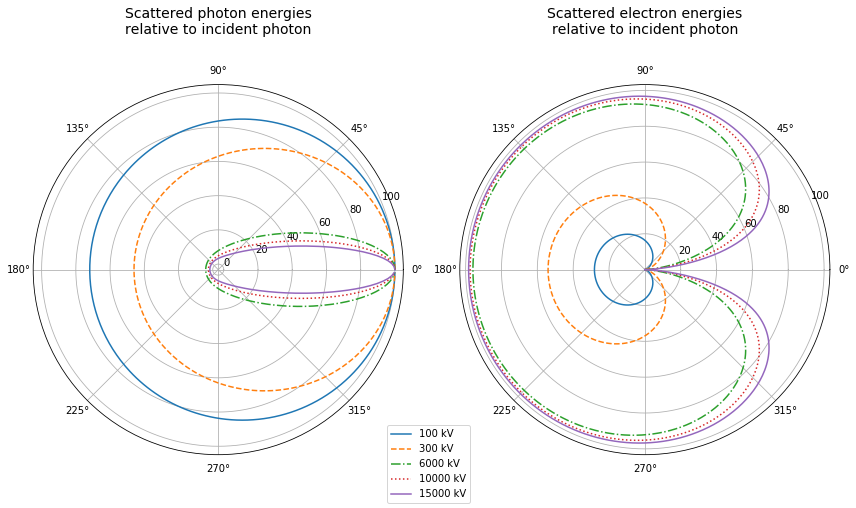

In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np

angles = [i*math.pi/180 for i in range(0,360)]
energies = [100,300,6000,10000,15000]           # keV
restMassEnergy = 511                            # keV
styles = ['-','--','-.',':','-']

scatterElectronE = np.empty((len(energies),360))
scatterPhotonE = np.empty((len(energies),360))
strEnergies = []

fig, (ax1,ax2) = plt.subplots(1,2, subplot_kw=dict(polar=True), figsize=(12,7))   

for k in range(0,len(energies)):
    alph = energies[k]/restMassEnergy
    for i in range(0,360):
        scatterAngleRad = angles[i]
        scatterElectronE[k][i] = 100*(energies[k]*(alph*(1-math.cos(scatterAngleRad)))/(1+alph*(1-math.cos(scatterAngleRad))))/energies[k]
        scatterPhotonE[k][i] = (100*(energies[k]/(1+(alph*(1-math.cos(scatterAngleRad)))))/energies[k])
    strEnergies.append(str(energies[k])+' kV')
    ax1.plot(angles,scatterPhotonE[k],styles[k])
    ax1.set_title('Scattered photon energies\nrelative to incident photon',y=1.12,fontsize=14)
    ax2.plot(angles,scatterElectronE[k],styles[k])
    ax2.set_title('Scattered electron energies\nrelative to incident photon',y=1.12,fontsize=14)

fig.legend(strEnergies,loc='lower center')
plt.tight_layout()
plt.show()

The values between 0 and 100 indicate the percentage of energy that the photon or electron have retained (or gained as kinetic energy) after scattering. The angles are the angle at which the scattered photon travels. The incident photon can be assumed to collide at the origin and to have originated from the 180° line. The graph nicely illustrates how for lower energy photons, much of their energy is retained no matter what angle they scatter at. For higher energy photons, forward scattered photons retain a large percentage of the incident photon's energy, but for scattering angles greater than 10°, the energy loss is sharp. 

Likewise, for scattered electrons, it can be seen for a 'grazing' collision where the photon is not deflected, the electron gains negligible energy. Inversely, when a photon is scattered at 180°, the electron gains most of the energy of the incident photon. This is especially visible for energies where $\alpha >> 1$, i.e., when the incident photon energy is significantly greater than the rest mass energy of the electron.